# A Novel Methodology for Modelling First and Second Order Phase Transformations - Thermodynamic Aspects, Variational Methods and Applications

## Abstract

This paper introduces a novel methodology for the mathematical modelling of first and second order phase transformations. It will be shown that this methodology can be related to certain limiting cases of the Cahn-Hilliard equation, specifically the cases of having (i) a convex molar free energy function and (ii) a convex molar free energy function with no regularization. The latter case is commonly regarded as unstable; however, by modifying the variational approach and solving for rate-dependent variables, we obtain a stabilized method capable of handling the missing regularization.

While the specific numerical method used to solve the equations (a mixed finite element approach) has been previously employed in related contexts (e.g., to stabilize solutions of the Laplace equation), its application to diffusion and diffusional phase transformations is novel. 

We prove the thermodynamic consistency of the derived method and discuss several use cases. Our work contributes to the development of new mathematical tools for modeling complex phase transformations in materials science.

Keywords: Cahn-Hilliard, Linear nonequilibrium thermodynamics, Phase Field Method, Mixed Finite Element Method, Theorem of Minimum Entropy Production, Thermodynamic Extremal Principle

# 1 Introduction

## 1.1 Preliminaries 

In their seminal work, Cahn and Hilliard (1958) [cahn1958free] presented a novel
approach to deriving the Helmholtz energy of binary alloys. The authors began by
postulating that the total Helmholtz energy $\mathcal{F}[x]$ of a volume $V$ with nonuniform composition
can be represented as a functional expansion of the mole fraction $x$, up to a certain
order in a Taylor series. Their ansatz can therfore be defined as follows:


$$\mathcal{F}[x] = \frac{1}{\Omega} \int_V f(x, \nabla x, \nabla^2 x, \ldots) \; dV, \tag{1} $$

where $\Omega$ denotes the molar volume of the alloy. For a stress-free system with
equal partial molar volumes of the components, it can be considered constant.
For a cubic crystal or isotropic medium, the functional can be simplified to include
only two summands: the molar free energy $f_0(x)$ of a uniform composition system, and
a "gradient energy" term $\kappa |\nabla x|^2$. The derivation involves neglecting
higher-order terms and applying the divergence theorem. This results in the characteristic free energy functional:

$$ \mathcal{F}[x] = \frac{1}{\Omega} \int_{V} f_0(x) + \frac{\kappa}{2} | \nabla x |^2 \; dV \tag{2} $$

For $f_0(x)$, a double-well potential is typically
employed, although this choice is often without justification in
the literature. However, the assumption of an interface energy is implicit, as it
implies that the mixed state ($x=0.5$) has a higher free energy than a linear mixture
of the individual phases in their equilibrium states ($x_{\alpha}=0.25$,
$x_{\beta}=0.75$). If no interface energy is intended, the double-well potential can
be replaced by its convex hull curve, as shown by the dashed line in Figure 1. This
represents the first limiting case (i) addressed in this publication.
Using the convex hull curve instead of the double-well potential introduces an
intriguing change in the behavior of a system's evolution, which has not been explored
previously. This may be due to the fact that finding an analytical expression for the
convex hull can be more challenging than working with the double-well. By employing
the convex free energy, the system's evolution will no longer focus on minimizing the
surface area between the two phases. Instead, it will solely aim to minimize the total
free energy of the system through phase growth, subject to boundary conditions and
mass conservation. 
Another intriguing property of using the convex hull curve is that it eliminates the
need for regularization, which typically requires $\kappa > 0$ for stability. Although
Cahn and Hilliard referred to the term $\kappa |\nabla x|^2$ as "gradient energy", it
has become common to call it a regularization or homogenization term due to its
smoothing effect on the interface. This methodology is also known as "Laplacian
smoothing" in fields like image processing, where similar techniques are used for
denoising and smoothing images. Interestingly, in the classical Cahn-Hilliard model,
which employs a typical double-well potential, this regularization term is necessary
for stability, meaning $\kappa > 0$. However, when using the convex counterpart of the
double-well, curiously, the homogenization term becomes unnecessary (i.e., $\kappa =
0$) for stability, provided an appropriate numerical scheme is employed, 
which will be discussed in section 2.3. This corresponds to limiting case (ii).
As expected, the interface between the phases will exhibit a very sharp profile in
this case. Furthermore, we will demonstrate that the overall quality of the system's
evolution remains unaffected by regularization, i.e., both cases (i) and (ii) evolve
accordingly, differing only in their representation, with (i) featuring a smooth
interface and (ii) displaying a sharp interface. Notably, the evolution will be
significantly different from the classical Cahn-Hilliard model that incorporates
interface energy. Interestingly, Cahn and Hilliard themselves noted that if
$\kappa$ is set to zero, the interface becomes sharp [cahn1958free]. We will explore
their findings in more detail below:

*We can see no reason why $\kappa$ should change 
sign or vanish in the unstable region, but we are unable 
to prove that it could not happen. If for some system 
there were a range over which $\kappa \leq 0$, then there would be 
a corresponding discontinuity in the interface profile 
and the treatment would have to be modified accordingly.*

The term "unstable region" refers to the two-phase (i.e. interface) region in a p-V diagram
below the critical temperature $T_c$, where a phase cannot exist in a homogeneous equilibrium state.
For now, we simply want to motivate the
special case of $\kappa = 0$ by noting that it can be beneficial to have full control
over the interface width when performing multiphysics simulations.
Moreover, it can be reasonable to have a sharp interface when the length scale of the
problem permits it. Thermodynamics relies on the assumption that quantities like pressure and temperature are 
assigned to a volume that is large enough for the assumptions of statistical mechanics to hold.
In the numerical continuum treatment of
nonequilibrium Thermodynamics, this means that each volume element in the domain must
contain enough particles (atoms or molecules) to ensure the validity of these
assumptions, effectively constraining the mesh size to be larger than a certain
threshold. However, when there is no interface energy and the length scale allows it,
it becomes legitimate to approximate the interface as sharp.
Note that this statement only holds for the continuum/volumetric treatment, as there
are also sharp interface models, such as those proposed by [dreyer2017sharp], that operate
with idealized surfaces representing the interface. 
In these models, the interface is
treated as a manifold, allowing for the assignment of interface energy despite its
infinitesimally thin nature.

In [1]:
#!/usr/bin/env python

__title__      = "A Novel Methodology for Modelling First and Second Order Phase Transformations - Thermodynamic Aspects, Variational Methods and Applications"
__author__     = "Wolfgang Flachberger"
__copyright__  = "(c) 2024, Wolfgang Flachberger"
__credits__    = ["Wolfgang Flachberger", "Thomas Antretter"]
__license__    = "GPL"
__version__    = "1.0.1"
__maintainer__ = "Wolfgang Flachberger"
__email__      = "wolfgang.flachberger@gmail.com"
__status__     = "Production"

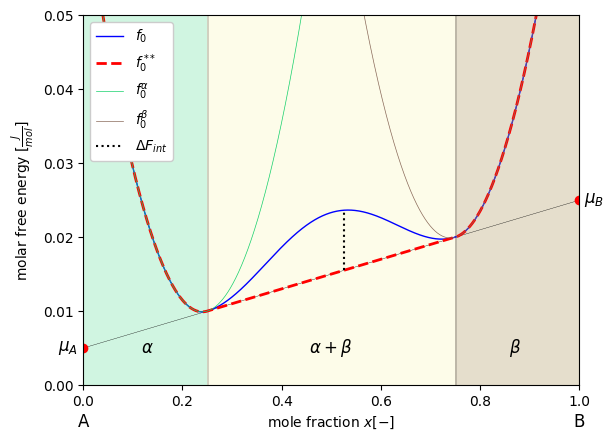

In [2]:
""" + + + + + + + + + + + + + + Utility Functions + + + + + + + + + + + + + + + + """

def magnitude(x): 
    """ magnitude of a scalar """
    return (x**2)**(1/2)

def ramp(x):
    """ ramp function / macaulay bracket """
    return (magnitude(x) + x)/2 

def step(x,a): 
    """ heaviside function with jump at x=a """
    # can be derived by differentiating the ramp function.
    return (-2*a + 2*x)*((-a + x)**2)**(-0.5)/2 + (1.0*a - 1.0*x)*((-a + x)**2)**(-0.5)/2 + 1/2

def h(x,a,b):
    """ smooth transition helper fuction """
    x = (x-a) / (b-a)
    return  3*x**2 - 2*x**3

def smooth_step(x,a,b):
    """ C^2 continous heaviside function with a smooth transition in the intervall [a,b] """
    return (step(x,a) - step(x,b))*h(x,a,b) + step(x,b) 

""" + + + + + + + + + + + + + + Thermodynamics  + + + + + + + + + + + + + + + + + """

def alpha(x):
    """ order function of phase alpha """
    return 1 - smooth_step(x,0.25,0.75)

def beta(x):
    """ order function of phase beta """
    return 1 - alpha(x)

def f_alpha(x): 
    """ free energy of phase alpha """
    return 0.005 + x*0.02 + (x - 0.25)**2

def f_beta(x): 
    """ free energy of phase beta """
    return 0.005 + x*0.02 + (x - 0.75)**2

def f0_(x): 
    """ convex hull over the free energies of alpha and beta """
    return 0.005 + x*0.02 + ramp(x-0.75)**2 + ramp(0.25-x)**2

def f_0(x): 
    """ double-well """
    return f0_(x) + alpha(x)*beta(x)/30

""" + + + + + + + + + + + + + + + + + Plot  + + + + + + + + + + + + + + + + + + + """

import numpy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

x = numpy.arange(0.0,1.0,0.0001)
#plt.rcParams.update({'font.size': 12})
#plt.rcParams.update({'font.family': 'serif'})
plt.figure(dpi=100)
plt.plot(x, 0.005 + x*0.02,'k', linewidth=0.25)
plt.axvline(x = 0.251,color ='k', linewidth=0.25)
plt.axvline(x = 0.751,color ='k', linewidth=0.25)
plt.plot(x, f_0(x),'b',label=r'${f_0}$', linewidth=1)
plt.plot(x, f0_(x),'r--',label=r'${f_{0}^{\:{**}}}$', linewidth=2)
plt.plot(x, f_alpha(x),'#14d06a',label=r'${f_{0}^{\alpha}}$', linewidth=0.5)
plt.plot(x, f_beta(x),'#896959',label=r'${f_{0}^{\beta}}$', linewidth=0.5)
plt.plot([0.525, 0.525], [0.0155, 0.0235],'k:',label='$\Delta F_{int}$')
plt.xlabel("mole fraction " + r'$x[-]$')
plt.ylabel("molar free energy " + r'$[\frac{J}{mol}]$')
plt.xlim([0.0,1.0])
plt.ylim([0.0,0.05])
plt.text(0, -0.005, 'A', ha='center', va='center', fontsize=12)
plt.text(1, -0.005, 'B', ha='center', va='center', fontsize=12)
plt.text(-0.03, 0.005, '$\mu_A$', ha='center', va='center', fontsize=12)
plt.text( 1.03, 0.025, '$\mu_B$', ha='center', va='center', fontsize=12)
plt.text(0.13, 0.005, r'$\alpha$', ha='center', va='center', fontsize=12)
plt.text(0.87, 0.005, r'$\beta$', ha='center', va='center', fontsize=12)
plt.text(0.5 , 0.005, r'$\alpha+\beta$', ha='center', va='center', fontsize=12)
plt.plot(0, 0.005, 'ro')  
plt.plot(1, 0.025, 'ro')
plt.gca().add_patch(Rectangle((0,    0), 0.25, 0.05, alpha=0.2, facecolor='#14d06a'))
plt.gca().add_patch(Rectangle((0.25, 0), 0.75, 0.05, alpha=0.2, facecolor='#f5f293'))
plt.gca().add_patch(Rectangle((0.75, 0), 0.25, 0.05, alpha=0.2, facecolor='#896959'))
plt.legend(loc=2,framealpha=1.0);

**Figure 1:** $f_0$ represents a general double-well potential as proposed by Cahn and Hilliard. The molar free energies of the individual phases are given by $f_{0}^{\alpha}$ and $f_{0}^{\beta}$ respectively. In an equilibrium system without interface energy the molar free energy is given by the convex hull curve $f_{0}^{**}$. If an interface energy is assumed as for $f_0$, the interface energy is given by $\Delta F_{int}$.

## 1.2 The Double-Well Potential

### 1.2.1 Implications
The classical approach to introducing the Cahn-Hilliard equation involves the example
of spinodal decomposition in a two-phase binary solution. Therefore, a simple assumption 
for the double-well potential is made:

$$ \Phi(x) = \frac{1}{4}x^2(1-x)^2 \tag{3} $$

This is usual form the double-well potential is presented in the literature 
and it implies that the components have to be entirely separated from each 
other (either $x=0$ or $x=1$) to reach equilibrium.  
From a physical point of view this is a specific case but it is also convinent since 
the notions of mole fraction, phase fraction and order parameter become identical.
While the free energy $\Phi$ is, due to its simplifying implications, benficial for 
introducing the concept of the Cahn-Hilliard equation or Phase Field 
Methods (PFM) in general it nevertheless caused some confusion between the PFM community 
(focused on mathematics) and the reactive diffusion community (focused on
materials science). It lead Material scientist to belive that there is no distinction
between mole fraction, phase fraction and order function in the Cahn-Hilliard equation, 
since these concepts become blurred for the free energy defined in equation (3).
The misunderstanding can be resolved by investigation of the proposed limiting cases
of the Cahn-Hilliard equation and their relation to reactive diffusion. This is because reactive diffusion *is* the limiting case 
(ii) discussed in this paper. All models of Svoboda [svoboda2006diffusion][svoboda2013new][svoboda2017incorporation], 
for example, can be re-implemented to corresepond formally to the Cahn-Hilliard equation. A proof for this is given
in section 2.1.
For completeness, it needs to be mentioned that it is possible, even in materials science, 
to employ the double-well from equation (3) to soley introduce an order parameter to
describe different phases (see for example [miehe2014formulation]).
Moreover is equation (3) also helpful in modelling more interdisciplinary applications outside of
thermodynamics, for example in medical applications such as tumor growth [acosta2024analysis].
A numerical problem that can occur is due to the fact that the minima of equation (3) lie 
at the boundary of the permissible domain $[0,1]$ is the phenomenon that 
during the iterations of the nonlinear solver the increment might drift 
into the nonphysical realm of the domain (i.e. below zero or above one). This obviously reduces the quality of a numerical
solution. There exists however a new numerical approach by Acosta-Soba et al. 
which eliminates this problem [acosta2023upwind].

### 1.2.2 The effect of interface energy
To comprehend the significance of neglecting the interface energy as in the proposed limiting
cases (i) and (ii), it is essential to outline the thermodynamic situation encountered 
in the simple case of a double-well potential of the form of equation (3). 
The striving for total separation of the components as imposed is rather 
unusual in materials science. In an alloy for example, it would be expected that the 
stationary (minimum) points of the double-well are located within the $[0,1]$ domain, for the
mole fraction should obtain values corresponding to the mixing ratios of the solid solution 
crystalls to be described. This is also what Cahn and Hilliard primarily inteded to 
model in their famous publication and therfore gave no explicit equation for the 
double-well but introduced it purely graphical such as in Figure 1.
However, the case of equation (3) is also of physical relevance, e.g. 
for modelling gas bubbels in a liquid or for modelling the hydrophobic effect
that is observed when mixing water and oil.
The physical example of mixing water and oil, or, more generally water and 
hydrocarbons, is also a good starting point for explaining
the influence of the interface energy on the system evolution.
Most hydrocarbons have a negligible mixing enthalpy and negative, high-magnitude mixing entropy in water. 
This gives rise to the hydrophobic effect [silverstein1998real]. The polar $H_2 O$ molecules and nonpolar hydrocarbons arrange themselves in a specific way at the interface, leading to a reduction in microstates per macrostate, i.e., less entropy at the interface.
Therefore, the system strives to minimize free energy by maximizing entropy, and it
maximizes entropy by minimizing the area of contact (i.e., the interface). A key
result from the calculus of variations [walker2015shapes] reveals that globally minimizing a
surface area requires locally minimizing its curvature, resulting in typical spherical
shapes (or at least shapes with little curvature) that the Cahn-Hilliard equation predicts. 
If the interface energy is neglected on the other hand, the effect of spinodal decomposition
can not be obeserved, and there will be no tendency for the system to minimize its interface area.
In conclusion, it can be said that if the double-well from equation (3) is used, we
effectively impose the following conditions on the system of interest:

<ol>
 <li>The system strives for total separation of the components. </li>
 <li>The relative height of the "bump" in the double-well potential (i.e. the interface energy) corresponds to the free energy of mixing of the components.</li>
 <li>The standard free energies of the unmixed individual components are equal to one another.</li>
</ol>

While the standard Cahn-Hilliard equation may appear restrictive in its application,
we argue that this perception is reversed when considering the equation's underlying
structure. By modifying the free energy function, the CH equation can be transformed
into a highly versatile tool for modeling a wide range of phase transformation
phenomena. This flexibility arises from the ability to tailor the double-well
potential to specific problems, allowing the equation to capture diverse
characteristics.
The double-well potential should therfore be regarded as a placeholder that showcases what can be achieved with minimal effort. The real challenge lies in selecting an appropriate free energy function to model specific phenomena. A problem arises when attempting to assign names to these modified equations. Is the CH equation still the CH equation if we replace the double-well? Is it still a Phase Field Method? Replacing the double-well with a quadratic function, for instance, would result in a simple diffusion equation, albeit homogenized. Our goal is not to invent new nomenclature, but rather to demonstrate how to adapt and extend the CH equation to tackle various real-world phenomena.

### 1.2.3 Limitations and thermodynamic consistency
The Cahn-Hilliard model is often linked to Landau's Theory of first- and second-order
phase transformations near the critical point. In this
context, the CH model corresponds to modeling behavior below the critical point. The
special case (ii) corresponds specifically to the behavior at the
critical point, where two phases can coexist but without any driving force for separation.
However, Landau's Theory has been criticized for its inability to reproduce
experimental measurement data, leading to its replacement by the Renormalization Group
(RG) theory. Despite this, Landau's Theory still retains relevance in the field of FEM
simulation and continuum modeling. As a macroscopic/thermodynamic theory, it provides
a fundamental framework for understanding phase transitions at the mesoscopic scale.
In contrast, RG theory combines aspects of both thermodynamics and atomistics, making
it challenging to reconcile with continuum modeling. 

Additionally it is worth noting that the main point of 
the critique of Landau's theory is concerned with interfaces of gas and liquid phases 
and not with solid-solid interfaces [kondepudi2014modern].

The CH model is, however, a thermodynamically consistent model, which will be
demonstrated in section 2.1. Therefore, it does not deserve to be merely called
phenomenological. In fact, one could argue that this criticism can be extended
further: if we consider thermodynamics itself as phenomenological (a subject of
ongoing debate), then what does it mean to label a specific model within
thermodynamics as phenomenological? By recognizing the CH model's thermodynamic
consistency, we can avoid unnecessary classification and focus on its fundamental role
in understanding phase transitions.

# 2 Methodology

## 2.1 Affinity, chemical potential and thermodynamic consistency in the realm of a variational principle for multicomponent systems

The debate surrounding thermodynamic consistency in Phase Field Models (PFMs) has been
ongoing, with one key issue being the common mistake of interpreting $\mu$, the
functional derivative of the free energy with respect to the mole fraction, as the
chemical potential. In fact, within the Cahn-Hilliard equation, $\mu$ is an affinity
rather than a chemical potential. This misconception can lead to difficulties in
relating PFMs to real-world data and parameters.
To clarify this point and avoid further confusion, we will adopt standard notation
from materials science, where $\mu$ indeed represents the chemical potential. We will
instead use $\bar{\mu}$ to denote the parameter of the CH equation, which is often
mistakenly referred to as the chemical potential.
For completeness we want to prove thermodynamic consistency of the Cahn-Hilliard model (and related PFM-models) for the multi component case. With this we can also clarify the role of the chemical potential. Consider a thermodynamic system that is composed of $n$ distinct components, either molecular or atomic. The flux $ \underline{j}_i$ and the chemical potential $\mu_i$ of a component $i$ ($i=1,..,n$) are defined as follows:

$$ \underline{j}_i = - \sum_{k=1}^{n} \frac{L_{ik}}{T} \nabla \mu_k \;\;\;\; \forall i \tag{4} $$

$$ \mu_{i} = \frac{\partial F}{\partial m_i} \; \Biggr|_{T,V,m_{j \neq i}} \;\;\;\; \forall i \tag{5} $$

Here, $m_i$ is the number of moles of component $i$ in a reference volume element of volume $\omega$, while $F$ denotes the total free energy in the same volume element. $L_{ik}$ and $T$ represent the Onsager coefficients and the temperature respecitvely. Due to the conservation of mass we have:   

$$ \dot{m}_i + \omega \nabla \cdot \underline{j}_i = 0 \;\;\;\; \forall i \tag{6} $$

Due to the second law of thermodynamics the following condition must hold at all times:

$$ \xi := - \sum_{k=1}^{n} \underline{j}_k \cdot \nabla \big( \frac{\mu_k}{T} \big) \geq 0 \tag{7} $$

$\xi$ is the rate of entropy production per unit volume. In a nonequilibrium system it is greater than zero while it is equal to zero in an equilibrium state. A system is said to be thermodynamically consistent if the inequality $\xi \geq 0$ is satisfied and if its energy is conserved. If a system is to be described by mole fractions $x_i$ instead of moles we can make use of the following relations:

$$ m = \sum_{i=1}^{n} m_i \tag{8} $$

$$ x_i = \frac{m_i}{m} \;\;\;\; \forall i \tag{9} $$

For the mole fractions the following condition must hold:

$$ \sum_{i=1}^{n} x_i = 1 \tag{10} $$

For the moment we impose that the partial molar volumes of each component $i$ are equal. Therfore the partial molar volume of a component $i$ is equal to the molar volume of the whole system $\Omega$:

$$ \Omega_i = \Omega \;\;\;\; \forall i \tag{11} $$

We can make use of the following constraint:

$$ \sum_{i=1}^{n}  \underline{j}_i = \underline{0} \tag{12} $$

This equation is true in two cases: (i) For diffusion processes in fluids and solids where all components have equal partial molar volumes [kondepudi2014modern]. The equation is then also known as "no volume flow" constraint. (ii) For diffusion of substitutional components in crystalline solids, e.g. substitutional alloys [manning1971correlation] (also for different partial molar volumes of the components, if the volume change is accounted for).
The chemical potential of a component in terms of the mole fractions is given by [lupis1983chemical]:

$$ \mu_{i} =  f_m + \sum_{k=1}^{n-1} (\delta_{ik} - x_k) \frac{\partial f_m}{\partial x_k} \;\;\;\; \forall i \tag{13} $$

Here, $f_m$ denotes a general molar free energy. Note that equation (13) also satisfies the Gibbs-Duhem equation. A proof can be found in Appendix A. The condition for mass conservation is also adapted to depict the evolution of mole fractions:

$$ \dot{x}_i + \Omega \nabla \cdot \underline{j}_i = 0 \;\;\;\; \forall i \tag{14} $$

However, the most elegant and simple relation is obtained if the concentration $c$ is used in the evolution equation:

$$ \dot{c}_i + \nabla \cdot \underline{j}_i = 0 \;\;\;\; \forall i \tag{15} $$

The concentration of a compontent $i$ is given by: 

$$ c_i = \frac{x_i}{\Omega} \tag{16} $$

Furthermore, we impose:

$$ \Omega, T = const. \tag{17} $$

Since the system is defined in terms of mole fractions we can express the $n$-th component in terms of the other $n-1$ components by rearranging equation (10):

$$ x_n := 1 - \sum_{i=1}^{n-1} x_i \tag{18} $$

Therfore, only $n-1$ variables are needed to define the system composition. For compactness, the collective mole fractions of the different components, i.e. the system composition, can also be expressed as an array: 

$$ \{x\} := \begin{bmatrix} x_{1} \\ . \\ . \\ x_{n-1} \end{bmatrix} \tag{19} $$

The same goes for the flux of the $n$-th component if equation (12) is modified:

$$ \underline{j}_n := - \sum_{i=1}^{n-1}  \underline{j}_i \tag{20} $$

By rearranging the definition of the volumetric rate of entropy production $\xi$, we can explicitly express the last element of the sum over all $n$ components

$$ \xi := - \frac{1}{T} \Big( \sum_{k=1}^{n-1} \underline{j}_k \cdot \nabla \mu_k + \underline{j}_n \cdot \nabla \mu_n \Big) \geq 0 \tag{21} $$

This leaves us with the opportunity to insert the expression for the flux of the $n$-th component:

$$ \xi := - \frac{1}{T} \Big( \sum_{k=1}^{n-1} \underline{j}_k \cdot \nabla \mu_k + \big( - \sum_{i=1}^{n-1} \underline{j}_i \big) \cdot \nabla \mu_n \Big) \geq 0 \tag{22} $$

Since the two sums are equal except for the indices of chemical potentials we can simplify the inequality:

$$ \xi := - \frac{1}{T} \sum_{k=1}^{n-1} \underline{j}_k \cdot \big( \nabla \mu_k - \nabla \mu_n \big) \geq 0 \tag{23} $$

The usual definition of fluxes according to equation (4) is therefore replaced by:

$$ \underline{j}_i := - \sum_{k=1}^{n-1} \frac{L_{ik}}{T} \big( \nabla \mu_k - \nabla \mu_n \big) \;\;\;\; \forall i \tag{24} $$

This ensures the positivity of the rate of entropy production: 

$$ \xi := \frac{1}{T^2} \Big( \sum_{k=1}^{n-1} \sum_{i=1}^{n-1} L_{ik} \big( \nabla \mu_i - \nabla \mu_n \big) \cdot \big( \nabla \mu_k - \nabla \mu_n \big) \Big) \geq 0 \tag{25} $$

The result for the flux in equation (24) appears arbitrary but things are clarified by investigating the term $\big( \nabla \mu_k - \nabla \mu_n \big)$. Since the chemical potential of component $i$ is defined in equation (13), the chemical potential of the last component $n$ can be identified as: 

$$ \mu_{n} := f_m - \sum_{k=1}^{n-1} x_k \frac{\partial f_m}{\partial x_k} \tag{26} $$

hence: 

$$ \mu_{i} - \mu_{n} = \frac{\partial f_m}{\partial x_i} \;\;\;\; \forall i \tag{27} $$

Which further simplifies the definition of flux: 

$$ \underline{j}_k := - \sum_{i=1}^{n-1} \frac{L_{ik}}{T} \nabla \big(  \frac{\partial f_m}{\partial x_i} \big) \;\;\;\; \forall k \tag{28} $$

Therfore we denote the affinity of the $i$-th component with respect to the (last) $n$-th component as $\bar{\mu}_i$: 

$$ \bar{\mu}_i := \mu_{i} - \mu_{n} \;\;\;\; \forall i \tag{29} $$

All necessary equations can also be derived from the Lagrangian: 

$$ \mathcal{L}(\{x\},\{\underline{j}\},\{\bar{\mu}\}) := \frac{d}{dt} \Big( \frac{f_m(\{x\})}{\Omega} \Big) + \frac{T}{2} \sum_{k=1}^{n-1} \sum_{i=1}^{n-1} L_{ik}^{-1} (\underline{j}_i \cdot \underline{j}_k) - \sum_{k=1}^{n-1} \bar{\mu}_k \Big(\frac{d}{dt} \big( \frac{x_k}{\Omega} \big) + \nabla \cdot \underline{j}_k \Big) \tag{30} $$

Here, the affinities $\bar{\mu}_k$ were used as Lagrangian multipliers to incorporate the mass conservation constraint. There are also other examples where physical quantities emerge as Lagrangian multipliers in fundamental variational problems, see for example [flachberger2021investigating]. Variation with respect to a flux $\underline{j}_k$ yields: 

$$ \delta_{\underline{j}_k} \mathcal{L} := T \sum_{i=1}^{n-1} L_{ik}^{-1} \underline{j}_i + \nabla \bar{\mu}_k = 0 \tag{31} $$

$$ \underline{j}_i = - \sum_{k=1}^{n-1} \frac{L_{ik}}{T} \nabla \bar{\mu}_k \;\;\;\; \forall i \tag{32} $$

Variation with respect to the mole fraction $x_k$ yields: 

$$ \delta_{x_k} \mathcal{L} := \frac{d}{dt} \Big( \frac{\delta_{x_k} f_m(\{x\})}{\Omega} \Big) - \bar{\mu}_k \frac{d}{dt} \big( \frac{\delta_{x_k} x_k}{\Omega} \big) = 0 \;\; \Big| \cdot dt \tag{33} $$

$$ \bar{\mu}_k = \frac{d \Big( \frac{\partial f_{m}}{\partial x_k} \frac{1}{\Omega} \Big)}{d \Big( \frac{1}{\Omega} \Big)} \tag{34} $$

$$ \bar{\mu}_k = \frac{\partial f_m}{\partial x_k} \;\;\;\; \forall k \tag{35} $$

Lastly, variation with respect to the affinity $\bar{\mu}_k$ yields the mass conservation constraint for component $k$: 

$$ \frac{d}{dt} \big( \frac{x_k}{\Omega} \big) + \nabla \cdot \underline{j}_k = 0  \;\;\;\; \forall k \tag{36} $$

Equations (32) and (35) are reminiscent of equations (4) and (5), however they are not the same. A soon as constraint (12) is imposed on equations (4) and (5) the system becomes overdetermined and may be reformulated to satisfy equations (32) and (35). Considered on their own, both representations are however thermodynamically consistent. It also must be noted that the Onsager coefficients $L_{ik}$ must be defined differently for the two cases. However, due to equations (7) and (25) $L_{ik}$ must always be a symmetric and positive semi-definite matrix, as postulated by Lars Onsager. It is therfore proofed that reactive diffusion models and the Cahn-Hilliard model are inherently the same, just distinguishable by their definitions of the molar free energy $f_m$. Considering a binary system and combining equations (32), (35) and (36) yields:

$$ \dot{x} = \Omega \nabla \cdot \Big( \frac{L}{T} \nabla \Big( \frac{\partial f_m}{\partial x} \Big) \Big) \tag{37} $$

By choosing $\Omega = 1$, $\frac{L}{T}=M$ and $f_m = f_0(c) + \tfrac{\kappa}{2} |\nabla c|^2$ the evoulution equation can also be presented in terms of the concentration: 

$$ \dot{c} = \nabla \cdot \Big( M \nabla \Big( \frac{\delta f_m}{\delta c} \Big) \Big) \tag{38} $$

Equation (38) is the usual way the Cahn-Hilliard equation is presented in the Literature. This equation also hints to the problem that is encountered when a convex molar free energy is employed; the function $f_m$ has to be at least $C^3$ continuous if the equation is to be solved directly. This gives rise to the assumption, that the relation between reactive diffusion and Phase Field Methods was often overlooked because the formalisms seem incompatible.

## 2.2 Variational principles in nonequilibrium Thermodynamics

The Lagrangian presented in equation (30) can also be derived using the Thermodynamic Extremal
Principle (TEP) [svoboda2023note]. This approach is particularly useful for systems
defined by a total free energy functional $\mathcal{F}$. The Thermodynamic Extremal Principle (TEP) is formulated as follows:

$$ \delta (\dot{\mathcal{F}} + \tfrac{T}{2} \mathcal{P}) = 0 \tag{39} $$

where $\mathcal{P}$ represents the rate of total entropy production. For a detailed
derivation, see references such as [emmerich2003diffuse] or [svoboda2005application].
The existence of the TEP was initially postulated by Kelvin, while Lars Onsager
was the first to formulate the relations of linear thermodynamics in this manner.
However, it was Prigogine who presented a general formulation and demonstrated the
validity of the principle [kondepudi2014modern]. Prigogine referred to this
principle as the "Theorem of Minimum Entropy Production" because he found that the
rate of entropy production reaches a minimum value at the nonequilibrium stationary
state. As noted by in [svoboda2023note], this title can however be misleading
since the rate of entropy production actually reaches its constrained maximum during
the evolution of thermodynamic systems that transition from a general nonequilibrium
state to either equilibrium or a stationary nonequilibrium state.
The TEP was formulated in [svoboda2023note] with respect to the fluxes $\underline{j}$ 
to demonstrate that the evolution of a general nonequilibrium state corresponds 
to maximum dissipation. The formulation is as follows:

$$ \delta_{\underline{j}} \int_{V} \mathcal{L}(\underline{j}, \nabla \bar{\mu}) \; dV := \delta_{\underline{j}} \int_{V} \Big( \underline{j} \cdot \nabla \bar{\mu} + \frac{T}{2L} | \underline{j} |^2 \Big) \; dV = 0 \tag{40} $$

$$ \underline{j} = - \frac{L}{T} \nabla \bar{\mu} \tag{41} $$

Emmerich [emmerich2003diffuse] formulated the Thermodynamic Extremal Principle (TEP) in terms
of the affinity $\bar{\mu}$, as follows:

$$ \delta_{\bar{\mu}} \int_{V} \mathcal{L}(\bar{\mu}, \nabla \bar{\mu}) \; dV := \delta_{\bar{\mu}} \int_{V} \Big( \bar{\mu} \dot{c} + \frac{L}{2T} \nabla \bar{\mu} \cdot \nabla \bar{\mu} \Big) \; dV = 0 \tag{42} $$

Here, the first term of the integrand $\bar{\mu} \dot{c}$ corresponds to the rate of free energy and the second term $\frac{L}{2T} \nabla \bar{\mu} \cdot \nabla \bar{\mu}$ corresponds to the rate of entropy production. variation with with respect to the affinity $\bar{\mu}$ yields the well known evolution equation:

$$ \dot{c} + \nabla \cdot (- \frac{L}{T} \nabla \bar{\mu}) = 0 \tag{43} $$

with the common variational form for usual continuous Galerkin type numerical schemes: 

$$ \int_{V} \dot{c}v \; dV = \int_{V} L \nabla v \cdot \nabla \bar{\mu}(c) \; dV \tag{44} $$

While a simple approach like the one described above might seem appealing for solving
the Cahn-Hilliard (CH) equation, it may not always be favourable to employ. A crucial consideration is that the variational form of this evolution equation will only be stable for continuous Galerkin methods if $\bar{\mu}$ is at least $C^1$ continuous [flachberger2024numerical]. This can be a problem when dealing with relaxed potentials, such as the convex hull curve of a double well potential. In such cases, it is necessary to solve for the flux directly to avoid the discontinuity of the solution, which will be discussed in detail in the next section.
Furthermore, coupling diffusion phenomena with mechanical models can be challenging
since it is not immediately clear which part of the functional corresponds to
dissipative and energy terms. To overcome these difficulties, we introduced the
Lagrangian, providing a straightforward computational methodology for solving the CH
equation.

## 2.3 A mixed finite element method for nonequilibrium Thermodynamics

### 2.3.1 Variational Formulation

For simulation purposes the Lagrangian in equation (30) can even be adapted
into a discrete time setting. This is particularly useful when performing
time-dependent simulations in a backward time discretization scheme. In this case, the
variational formulation for Ritz/Galerkin-type methods can be easily obtained by
computing the first variation of the functional with respect to all independent
variables $(\{x\}, \underline{j}, \bar{\mu})$. Furthermore, newer finite element tools like FEniCSx or COMSOL
even include automated differentiation functions, which allows for rapid implementation of
models and simpler coupling of many phenomena.
For simplicity, we will consider a binary system:

$$ \int_{V} \mathcal{L}(x, \underline{j}, \bar{\mu}) \; dV := \int_{V} \Big( \frac{1}{\Omega} \frac{f_m(x)-f_m(x_t)}{\Delta t} + \frac{T}{2L} |\underline{j}|^2 +  \bar{\mu} \big( \frac{1}{\Omega} \frac{x - x_t}{\Delta t} + \nabla \cdot \underline{j}\big) \Big) \; dV \tag{45} $$

Computing the variational derivative:

$$ \delta \int_{V} \mathcal{L}(x, \underline{j}, \bar{\mu}) \; dV = 0 \tag{46} $$

yields: 

$$ \frac{\partial}{\partial \varepsilon} \int_{V} \Big( \frac{1}{\Omega} \frac{f_m(x+\varepsilon \hat{x})-f_m(x_t)}{\Delta t} + \frac{T}{2L} | \underline{j}+\varepsilon \underline{\hat{j}} |^2 +  (\bar{\mu} + \varepsilon \hat{\bar{\mu}}) \big(  \frac{1}{\Omega} \frac{x+\varepsilon \hat{x} - x_t}{\Delta t} + \nabla \cdot (\underline{j}+\varepsilon \underline{\hat{j}}) \big) \Big) \; dV \; \Biggr|_{\varepsilon=0} = 0 \tag{47} $$

$$ \int_{V} \Big(  \frac{1}{\Omega} \frac{1}{\Delta t} \frac{\partial f_m(x)}{\partial x} \hat{x} + \frac{T}{L} \underline{j} \cdot \underline{\hat{j}} +  \hat{\bar{\mu}} \big( \frac{1}{\Omega} \frac{x - x_t}{\Delta t} + \nabla \cdot \underline{j} \big) +  \bar{\mu} \big(  \frac{1}{\Omega} \frac{\hat{x}}{\Delta t} + \nabla \cdot \underline{\hat{j}} \big) \Big) \; dV = 0 \;\;\;\;\; \forall \; \hat{x},\underline{\hat{j}},\hat{\bar{\mu}} \tag{48} $$

If the testfunctions are varied individually the individual variational formulations are yielded: 

$$ 0 = \int_{V} \Big( \frac{\partial f_m(x)}{\partial x} + \bar{\mu} \Big) \hat{x} \; dV \;\;\;\;\; \forall \; \hat{x} \in D^0 \tag{49} $$

$$ 0 = \int_{V} \Big( \frac{T}{L} \underline{j} \cdot \underline{\hat{j}} + \bar{\mu} \nabla \cdot \underline{\hat{j}} \Big) \; dV \;\;\;\;\; \forall \; \underline{\hat{j}} \in R^1 \tag{50} $$

$$ 0 = \int_{V} \big( \frac{1}{\Omega} \frac{x - x_t}{\Delta t} + \nabla \cdot \underline{j} \big) \hat{\bar{\mu}} \; dV \;\;\;\;\; \forall \; \hat{\bar{\mu}} \in D^0 \tag{51} $$

While the variational form (49) is straightforward, as it simply ensures that
$\bar{\mu}$ represents the chemical affinity, forms (50) and (51) are notable for
their ability to stabilize solutions of the Laplace equation. These forms were first
introduced in [brezzi1985two] and utilize a special mixed function space for their
solutions. To this end, we employ a discontinuous Galerkin finite element space of
degree zero for both the mole fraction and the affinity. The flux is
typically represented by interpolation functions of the $H(div)$ family, which are vector-valued and
rotation-free finite elements that are conforming to the divergence operator. This ensures that the
variational form strongly enforces the properties of the divergence operator in the
weak form, thereby conserving mass for transport-type equations. This approximation is
particularly beneficial when accurate results are required for multi-component
systems. The rotation-free property also eliminates unnecessary degrees of freedom, as
fluxes arise from the gradient of a potential field that is inherently rotation-free.
We denote the space of $H(div)$ conforming elements of degree one as $R^1$ and the
discontinuous Galerkin space of degree zero as $D^0$. Due to this choice of functionspace a regularization term 
as in the CH equation can be included by means of the jump operator "$[\cdot]$". Altering variational form (49) accordingly 
yields:

$$ 0 =  \int_{V} \Big( \frac{\partial f_m(x)}{\partial x} + \bar{\mu} \Big) \hat{x} \; dV + \int_{\partial \Omega_e} \kappa [x] [\hat{x}] \; dS \;\;\;\;\; \forall \; \hat{x} \in D^0 \tag{52} $$

Here $\partial \Omega_e$ denotes the boundaries of individual finite element cells.
An innovative aspect of this
variational form lies in its treatment of the affinity, which is not differentiated.
By solving for the flux explicitly the second order elliptical PDE in equation (38) is split into two first order PDEs.
In [flachberger2024numerical], a detailed analysis reveals why traditional
variational forms for reactive diffusion problems fail due to the continuity
properties of the affinity, beeing just $C^1$ continuous if a convex hull is employed. By avoiding differentiation of the affinity, our approach
circumvents these issues and is able to solve the discussed limiting cases. Note that while this mixed finite element method is
due to its properties taylored for this problem it is also possible to use standard (continous) Galerkin elements for all degrees of freedom.

### 2.3.2 Variable molar volumes

So far, the molar volume was always considered constant, as in the Cahn-Hilliard equation. The presented
method is however also particulary useful for modeling the behaviour of substitutional alloys with different partial molar volumes of the components or different molar volumes of the phases. This is of special interest, given that many
alloys exhibit multiple crystal structures with potentially different molar volumes, making it essential to
account for these differences in order to accurately capture their behavior.
Therfore it is necessary to define the dependence of the molar volume $\Omega$ on the composition in the Lagrangian (30). Computing the variational derivative of the Lagrangian will then obviously yield weak forms that are more complex than equations (49) to (51). This is however no problem as long as $\Omega(x)$ is at least $C^2$ continuous. Additionally the step of applying the variational derivative can, as already pointed out, be automated.
Curously, the variational forms (49)-(51) can also be employed if the molar volume depends on the phase and a convex molar free energy $f_{0}^{**}(x)$ is used. The proof for this is however mathematically involved and not relevant for all readers and was therfore moved to Appendix B.

The Onsager coefficient $L$ can also be chosen phase dependent and therefore as a function of the mole fraction $x$. However, the value of the Onsager coefficient should be held constant when applying the variation of the Lagrangian - otherwise one receives invalid evolution equations.
Alternatively, the variational form can be implemented directly, meaning that $L:=L(x)$ can be required if variational forms (50) to (52) are employed explicitly and not automatically derived from the Lagrangian.

### 2.3.3 A multicomponent example

Finally we want to give an example of how to implement a specific model within the presented methodology by considering the vacancy diffusion model derived by Svoboda in [svoboda2006diffusion]. The concept of "vacancy" refers to empty or vacant sites in a crystal lattice, which are
crucial for enabling diffusion in alloys. By allowing atoms to switch positions with vacant sites, vacancies
facilitate the movement of atoms within an alloy.
Since vacancies are merely empty sites in a crystal lattice, it's essential to recognize that they
are purely geometric features and do not constitute matter. This distinction is important, as it permits to treat
vacancies as a non-conserved component, allowing for more nuanced modeling of diffusion processes.
Therefore Svoboda suggested to treat a binary system with vacancies like a ternary system (with vacancies
constituting the third component). The composition of the system is then defined by so-called site fractions instead of 
mole fractions which refers to ratio of the amount of a component and the absolute number of available lattice sites in the 
atomic grid. We begin by definition of the free energy of the system which will just be a superposition of the convex hull from 
Figure 1, namely $f_{0}^{**}$ and a simple quadratic contribution of the site fraction of vacancies $x_0$:

$$ \mathcal{F}[x_0, x_1] := \int_V \frac{1}{\Omega} \Big( f_{0}^{**}(x_1) + k \cdot (x_0 - x_{0}^{eq})^2 \Big) \; dV \tag{53} $$

As can be seen, the free energy will consist only of the molar free energy of the equilibrium system $f_{0}^{**}$ if the vacancies $x_0$ assume their equilibrium site fraction $x_{0}^{eq}$.
A perfect crystal without vacancies and dislocations may possess less internal energy than one with imperfections, however, the presence
of imperfections increases the configurational entropy of the crystal, thereby reducing the free energy. The equilibrium site fraction
of vacancies marks the minimum of the overall free energy of the system with respect to vacancies. The dissipative part of the problem
is defined, according to [svoboda2006diffusion] by the following functional:

$$ \mathcal{P}[\underline{j}_0, \underline{j}_1, \phi] := \int_V \Big( \frac{1}{A_0} |\underline{j}_0|^2 + \frac{1}{A_1} |\underline{j}_1|^2 + \frac{1}{A_2} |-\underline{j}_0-\underline{j}_1|^2 + \frac{1}{A_{\phi}} \phi^2 \Big) \; dV \tag{54} $$

The coefficents $A_i$ are in general dependent on the composition and the diffusion coefficients. A definition can be found in [svoboda2006diffusion]. Note that the flux of component 2 was subsituted, according to equation (20), as $\underline{j}_2 := - \underline{j}_0 - \underline{j}_1 $. This not only constrains the system and enforces the vacancy mechanism but also causes the resulting Onsager coefficent matrix of the system to have non-diagonal entries. Therfore the fluxes become coupled and a driving force of one component may also cause fluxes of other components, as postulated by Onsager's reciprocal relations. The function $\phi$ is characteristic for this very model and represents the rate of generation and annihilation of vacancies. Since vacancies are a non-conserved component they can emerge and vanish in the bulk so as to facilitate diffusion. Their evolution in time is therfore also not determined by a pure conservation equation but rather a transport-type equation. The evolution equations are considered in the constraint functional $\mathcal{C}$:

$$ \mathcal{C}[x_0, x_1, \underline{j}_0, \underline{j}_1, \bar{\mu}_0, \bar{\mu}_1, \phi] := \int_V \Big( \bar{\mu}_0 \big( \frac{1}{\Omega} \frac{x_0 - x_{0}^{t}}{\Delta t} + \nabla \cdot \underline{j}_0 - \frac{\phi}{\Omega} \cdot (1-x_0) \big) + \bar{\mu}_1 \big( \frac{1}{\Omega} \frac{x_1 - x_{1}^{t}}{\Delta t} + \nabla \cdot \underline{j}_1 + \frac{\phi}{\Omega} \cdot x_1 \big) \Big) \; dV \tag{55} $$

As can be seen, the rate of annihilation and generation of vacancies $\phi$ not only impacts the evolution equation of vacancies but also of component $x_1$. This is because an increase of vacancies also increases the number of available sites in the lattice which impacts all site fractions. Therfore, the generation of vacancies also causes a strain and a change in the molar volume $\Omega$. This was nevertheless neglected since it would also require the mechanical treatment of the problem, which is beyond the scope of this publication. The final problem is defined by its Lagrangian:

$$ \int_V \mathcal{L}(x_0, x_1, \underline{j}_0, \underline{j}_1, \bar{\mu}_0, \bar{\mu}_1, \phi) \; dV := \mathcal{F} + \mathcal{P} + \mathcal{C} \tag{56} $$

$$ \delta \int_V \mathcal{L}(x_0, x_1, \underline{j}_0, \underline{j}_1, \bar{\mu}_0, \bar{\mu}_1, \phi) \; dV = 0 \tag{57} $$

# 3 Results

To explore the capabilities of our method, we employed the open-source finite element solver FEniCSx, which is continuously
developed by the FEniCS-community. The software relies on several key modules, including dolfinx
[BarattaEtal2023], basicx [ScroggsEtal2022][BasixJoss], and ufl [AlnaesEtal2014]. FEniCSx can be easily integrated
with Python 3 [van1995python] and was used in conjunction with matplotlib [hunter2007matplotlib] and pyvista
[sullivan2019pyvista] to generate all graphics.
To showcase the capabilities of our method, we investigate one- and two-dimensional
variational problems defined by forms (49)-(51). We start by exploring the
one-dimensional case, where we contrast solutions for the classical Cahn-Hilliard
model and its special cases (i) and (ii), all initialized with a common condition, namely a linearly rising
distribution of the mole fraction.
Figures (2)-(4) illustrate the time dependent phase distributions obtained for each scenario. As
anticipated, the classical Cahn-Hilliard model exhibits phase separation,
characterized by a smooth transition between the phases (Figure 2). In contrast, special case (ii)
features a sharp, discontinuous interface due to the absence of homogenization terms
and the presence of a convex hull curve, as shown in Figure 3. Interestingly, the solution is unstable as long
as the interface is not infinetly thin. By incorporating an
added regularization, special case (i) yields a smooth phase transition, similar to
that observed for the classical Cahn-Hilliard model, but with a wider phase transition
region, as depicted in Figure 4. For comparison the final states of the simulations are summarized in Figure 5.
The disparity in the interface thickness of special case (i) and the Cahn-Hilliard equation can be attributed to the convex free energy not imposing an energetic penalty on the interface. 
To prove this, we have performed the calculation again for many different interface energies.
In Figure (6) it can be seen that the interface energy unarguably impacts the width of the interface.
In the classical Cahn-Hilliard model, the "bump" in the double-well potential counteracts the regularization term, resulting in a smooth yet locally restricted interface. The interplay between these
mechanisms drives the interface surface area towards minimization in the multidimensional case, as will be demonstrated in
the two-dimensional example.
In this study, we consider a square domain of unit length, initialized with a random pattern for the mole fractions
as depicted in Figure 7. The binary system is composed of two components that are entirely separated from each
other at this stage. The blue region represents 100% component 2 and phase α, while the red region corresponds to
100% component 1 and phase β.
The evolution of the classical Cahn-Hilliard model is shown in Figure 8. As expected, the mole fraction approaches
its equilibrium value for each present phase respectively. Furthermore, the model exhibits a tendency to minimize
contact area between the two phases, resulting in typical spherical shapes. In contrast, we observe that limiting
cases (i) and (ii) exhibit distinct patterns.
In these cases, there are regions where the interface exhibits higher curvature, indicating that the model
does not prioritize contact area minimization. Nevertheless, the mole fraction reaches equilibrium values for each
phase respectively, as in the Cahn-Hilliard model. For limiting case (i), the overall evolution of the structure
corresponds to the evolution of limiting case (ii), with the notable exception being the smooth representation of
the interface. It is important to note that the calculation time is significantly lower in limiting case (ii) which
is due to the fact that the sharp representation of the interface also causes the matrices of the nonlinear solver 
to be more sparse.
Finally, we consider the ternary system with vacancies, defined by the variational problem in equation (57). The same initial condition of the previous
example are applied for component $x_1$. The initial condition for the vacancies will be uniformly set to its equilibrium site fraction 
$x_0 = x_{0}^{eq}$. Note that the dissipation term of vacancy flux is, unlike suggested in [svoboda2006diffusion],
neglected (implying that $A_0 \rightarrow \infty$) because it is assumed that moving a vacancy by itself does 
not account for any dissipation. However, since diffusion in 
subsititutional alloys is primarily enabled by atoms switching sites with vacancies, we nevertheless expect dissipation which is accounted
for by the other terms, containing $A_0$ and $A_1$. These coefficients are chosen as $A_1=2$, $A_2=1$ to trigger the so-called 
Kirkendall effect. Due to this choice the component $x_1$ will obviously diffuse two times faster than compnent $x_2$($= 1 - x_0 - x_1$). Thereby, the
need to counterbalance this disparity by a vacancy flux is created (according to equation (12)). As can be seen in Figure 12, 
the flux of vacancies $\underline{j}_0$ will create an excess in vacancies in the area of the inclusions and a lack of vacancies
in the bulk regions, as expected. The overall evolution of $x_1$ is depicted in Figure 11 and it can be seen by comparison to Figure 9 that the overall evolution is not drastically changed, but rather slowed down by the involved vacancy mechanism.

In [3]:
! python3 -c 'import dolfinx; print(f"DOLFINx version: {dolfinx.__version__}")'

DOLFINx version: 0.7.2


In [4]:
from mpi4py import MPI
from dolfinx.fem.petsc import NonlinearProblem
from dolfinx.nls.petsc import NewtonSolver
from dolfinx.plot import vtk_mesh
from dolfinx.fem import (FunctionSpace, Function, locate_dofs_topological, 
                         dirichletbc)
from dolfinx.mesh import (create_unit_square, locate_entities, CellType,
                          locate_entities_boundary, create_interval)
from ufl import (TestFunction, TrialFunction, jump, FacetNormal, dx, dS,
                 dot, grad, div, ln, FiniteElement, MixedElement, split,
                 Measure, derivative)
from petsc4py.PETSc import ScalarType
import time

In [5]:
l   = 1.0 # lenght of domain 
n_e = 200 # number of finite elements

domain = create_interval(MPI.COMM_WORLD, n_e, (0.0, l))

n  = FacetNormal(domain)
CG = FunctionSpace(domain, ("CG", 1)) 
DG = FunctionSpace(domain, ("DG", 0)) 

e_CG = FiniteElement("CG", domain.ufl_cell(), 1)
e_DG = FiniteElement("DG", domain.ufl_cell(), 0)

W = FunctionSpace(domain, MixedElement([e_DG, e_CG, e_DG]))

w         = Function(W)
(X, j, a) = split(w) 
q         = TestFunction(W)

dt = 1e-3
dx = Measure("dx", metadata={"quadrature_degree": 1}) # degree = 2*int_point-1 (in 1D)

X_0 = Function(DG)
X_0.interpolate(lambda x: x[0]) 

X_n = Function(DG)
X_n.interpolate(X_0) 

initial = numpy.copy(X_n.x.array)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

x = numpy.linspace(0,l,n_e)
o = numpy.ones(len(x+1))


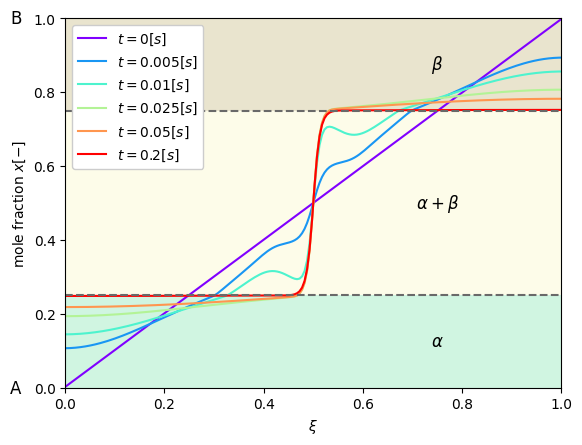

In [6]:
X_n.interpolate(X_0)
    
L  = ( (f_0(X)-f_0(X_n))/dt + dot(j,j)/2 + a*((X-X_n)/dt + j.dx(0)) )*dx 
L += (0.005/dt)*dot(jump(X,n),jump(X,n))*dS

dL = derivative(L,w,q) 

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

def on_boundary(x):
    return numpy.full(x.shape[1], True, dtype=bool)

boundary_facets = locate_entities_boundary(domain, domain.topology.dim-1, on_boundary)
boundary_dofs   = locate_dofs_topological(W.sub(1), domain.topology.dim-1, boundary_facets)
bc_0            = dirichletbc(ScalarType(0), boundary_dofs, W.sub(1))

bc = [bc_0]

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

problem = NonlinearProblem(dL, w, bc) 
solver  = NewtonSolver(MPI.COMM_WORLD, problem)

t = 0
count = [0,5,10,25,50]
color = iter(plt.cm.rainbow(numpy.linspace(0, 1, len(count)+1)))
for i in range(200):
    
    if i in count:
        plt.plot(x, X_n.x.array, c=next(color), label=r'${t = }$' \
                        +str(numpy.around(t, 3)) \
                        +r'$[s]$')

    solver.solve(w)
    X_n.interpolate(w.sub(0))
    
    t += dt

plt.plot(x, X_n.x.array, c=next(color), label=r'${t = }$' \
                        +str(numpy.around(t, 3)) \
                        +r'$[s]$')
plt.plot(x, 0.25*o, color='dimgray', linestyle='dashed')
plt.plot(x, 0.75*o, color='dimgray', linestyle='dashed')
plt.text(-0.1, 0.0, 'A', ha='center', va='center', fontsize=12)
plt.text(-0.1, 1.0, 'B', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.125, r'$\alpha$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.5, r'$\alpha+\beta$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.875, r'$\beta$', ha='center', va='center', fontsize=12)
plt.gca().add_patch(Rectangle((0,    0), 1, 0.25, alpha=0.2, facecolor='#14d06a'))
plt.gca().add_patch(Rectangle((0, 0.75), 1, 0.25, alpha=0.2, facecolor='#896959'))
plt.gca().add_patch(Rectangle((0, 0.25), 1, 0.75, alpha=0.2, facecolor='#f5f293'))
plt.xlabel(r"$\xi$") 
plt.ylabel("mole fraction " + r'$x [-]$')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=2,framealpha=1.0);

cahnhilliard = numpy.copy(X_n.x.array)


**Figure 2:** System evolution of the standard Cahn-Hilliard model. The contour visible is the distribution of the mole fraction $x$ after different times. The molar free energy $f_0(x)$ from Figure 1 is employed and the homogenization parameter was set to $\kappa = 5$. All other parameters were set to one ($L = T = \Omega = 1$).

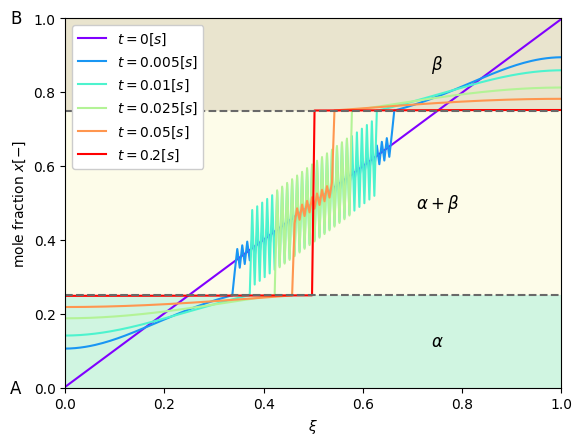

In [7]:
X_n.interpolate(X_0) 

L  = ( (f0_(X)-f0_(X_n))/dt + dot(j,j)/2 + a*((X-X_n)/dt + j.dx(0)) )*dx

dL = derivative(L,w,q)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

problem = NonlinearProblem(dL, w, bc) 
solver  = NewtonSolver(MPI.COMM_WORLD, problem)

t = 0
count = [0,5,10,25,50]
color = iter(plt.cm.rainbow(numpy.linspace(0, 1, len(count)+1)))
for i in range(200):
    
    if i in count:
        plt.plot(x, X_n.x.array, c=next(color), label=r'${t = }$' \
                        +str(numpy.around(t, 3)) \
                        +r'$[s]$')

    solver.solve(w)
    X_n.interpolate(w.sub(0))
    
    t += dt

plt.plot(x, X_n.x.array, c=next(color), label=r'${t = }$' \
                        +str(numpy.around(t, 3)) \
                        +r'$[s]$')
plt.plot(x, 0.25*o, color='dimgray', linestyle='dashed')
plt.plot(x, 0.75*o, color='dimgray', linestyle='dashed')
plt.text(-0.1, 0.0, 'A', ha='center', va='center', fontsize=12)
plt.text(-0.1, 1.0, 'B', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.125, r'$\alpha$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.5, r'$\alpha+\beta$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.875, r'$\beta$', ha='center', va='center', fontsize=12)
plt.gca().add_patch(Rectangle((0,    0), 1, 0.25, alpha=0.2, facecolor='#14d06a'))
plt.gca().add_patch(Rectangle((0, 0.75), 1, 0.25, alpha=0.2, facecolor='#896959'))
plt.gca().add_patch(Rectangle((0, 0.25), 1, 0.75, alpha=0.2, facecolor='#f5f293'))
plt.xlabel(r"$\xi$")
plt.ylabel("mole fraction " + r'$x [-]$')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=2,framealpha=1.0);


limit2 = numpy.copy(X_n.x.array)

**Figure 3:** System evolution for limiting case (ii). The contour visible is the distribution of the mole fraction $x$ after different times. The convex molar free energy $f_{0}^{**}(x)$ from Figure 1 is employed and the homogenization parameter was set to $\kappa = 0$. All other parameters were set to one ($L = T = \Omega = 1$). Note that the solution is just well behaved when the interface is infinetely thin.

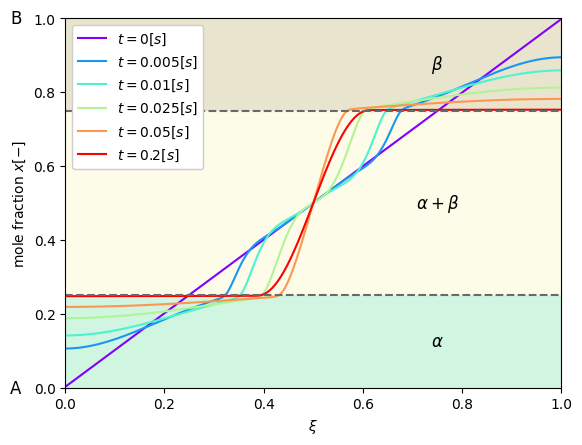

In [8]:
X_n.interpolate(X_0) 

L  = ( (f0_(X)-f0_(X_n))/dt + dot(j,j)/2 + a*((X-X_n)/dt + j.dx(0)) )*dx 
L += (0.005/dt)*dot(jump(X,n),jump(X,n))*dS

dL = derivative(L,w,q)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

problem = NonlinearProblem(dL, w, bc) 
solver  = NewtonSolver(MPI.COMM_WORLD, problem)

t = 0
count = [0,5,10,25,50]
color = iter(plt.cm.rainbow(numpy.linspace(0, 1, len(count)+1)))
for i in range(200):
    
    if i in count:
        plt.plot(x, X_n.x.array, c=next(color), label=r'${t = }$' \
                        +str(numpy.around(t, 3)) \
                        +r'$[s]$')

    solver.solve(w)
    X_n.interpolate(w.sub(0))
    
    t += dt

plt.plot(x, X_n.x.array, c=next(color), label=r'${t = }$' \
                        +str(numpy.around(t, 3)) \
                        +r'$[s]$')
plt.plot(x, 0.25*o, color='dimgray', linestyle='dashed')
plt.plot(x, 0.75*o, color='dimgray', linestyle='dashed')
plt.text(-0.1, 0.0, 'A', ha='center', va='center', fontsize=12)
plt.text(-0.1, 1.0, 'B', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.125, r'$\alpha$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.5, r'$\alpha+\beta$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.875, r'$\beta$', ha='center', va='center', fontsize=12)
plt.gca().add_patch(Rectangle((0,    0), 1, 0.25, alpha=0.2, facecolor='#14d06a'))
plt.gca().add_patch(Rectangle((0, 0.75), 1, 0.25, alpha=0.2, facecolor='#896959'))
plt.gca().add_patch(Rectangle((0, 0.25), 1, 0.75, alpha=0.2, facecolor='#f5f293'))
plt.xlabel(r"$\xi$")
plt.ylabel("mole fraction " + r'$x [-]$')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=2,framealpha=1.0);

limit1 = numpy.copy(X_n.x.array)

**Figure 4:** System evolution for limiting case (i). The contour visible is the distribution of the mole fraction $x$ after different times. The convex molar free energy $f_{0}^{**}(x)$ from Figure 1 is employed and the homogenization parameter was set to $\kappa = 5$. All other parameters were set to one ($L = T = \Omega = 1$).

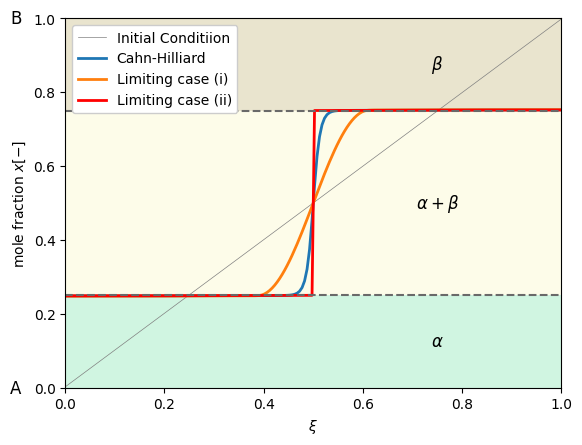

In [9]:
plt.figure(dpi=100)
plt.plot(x, initial,'grey', label='Initial Conditiion', linewidth=0.5)
plt.plot(x, cahnhilliard, label='Cahn-Hilliard', linewidth=2)
plt.plot(x, limit1, label='Limiting case (i)', linewidth=2)
plt.plot(x, limit2, 'r', label='Limiting case (ii)', linewidth=2)
plt.plot(x, 0.25*o, color='dimgray', linestyle='dashed')
plt.plot(x, 0.75*o, color='dimgray', linestyle='dashed')
plt.text(-0.1, 0.0, 'A', ha='center', va='center', fontsize=12)
plt.text(-0.1, 1.0, 'B', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.125, r'$\alpha$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.5, r'$\alpha+\beta$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.875, r'$\beta$', ha='center', va='center', fontsize=12)
plt.gca().add_patch(Rectangle((0,    0), 1, 0.25, alpha=0.2, facecolor='#14d06a'))
plt.gca().add_patch(Rectangle((0, 0.75), 1, 0.25, alpha=0.2, facecolor='#896959'))
plt.gca().add_patch(Rectangle((0, 0.25), 1, 0.75, alpha=0.2, facecolor='#f5f293'))
plt.xlabel(r"$\xi$")
plt.ylabel("mole fraction " + r'$x [-]$')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=2,framealpha=1.0);

**Figure 5:** Direct comparison of the final states ($t=0.2[s]$) of the limiting cases (i) and (ii) as well as the Cahn-Hilliard model.

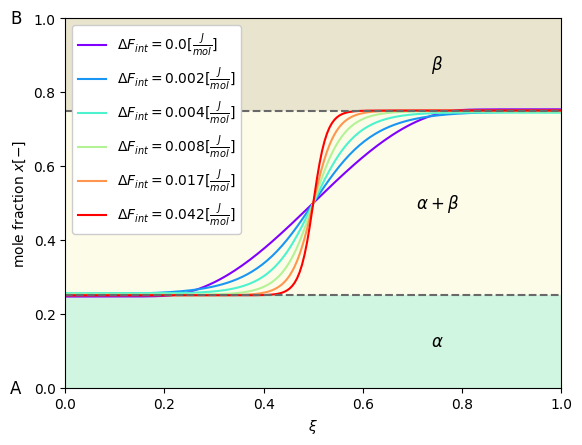

In [10]:
dg_mix = [0.0, 0.25, 0.5, 1, 2, 5]

color = iter(plt.cm.rainbow(numpy.linspace(0, 1, len(dg_mix))))

plt.figure(dpi=100)
for k in range(len(dg_mix)):
    
    def f_0_(x): 
        return f0_(x) + dg_mix[k]*alpha(x)*beta(x)/30
    
    L  = ( (f_0_(X)-f_0_(X_n))/dt + dot(j,j)/2 + a*((X-X_n)/dt + j.dx(0)) )*dx 
    L += (0.1/dt)*dot(jump(X,n),jump(X,n))*dS

    dL = derivative(L,w,q) 

    problem = NonlinearProblem(dL, w, bc) 
    solver  = NewtonSolver(MPI.COMM_WORLD, problem)

    t = 0 

    for i in range(200):

        solver.solve(w)
        X_n.interpolate(w.sub(0))
        t += dt
    
    plt.plot(x, X_n.x.array, c=next(color), label=r'${\Delta F_{int} = }$' \
                                   +str(numpy.around(dg_mix[k]*alpha(0.5)*beta(0.5)/30, 3)) \
                                   +r'$[\frac{J}{mol}]$')

plt.plot(x, 0.25*o, color='dimgray', linestyle='dashed')
plt.plot(x, 0.75*o, color='dimgray', linestyle='dashed')
plt.text(-0.1, 0.0, 'A', ha='center', va='center', fontsize=12)
plt.text(-0.1, 1.0, 'B', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.125, r'$\alpha$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.5, r'$\alpha+\beta$', ha='center', va='center', fontsize=12)
plt.text(0.75, 0.875, r'$\beta$', ha='center', va='center', fontsize=12)
plt.gca().add_patch(Rectangle((0,    0), 1, 0.25, alpha=0.2, facecolor='#14d06a'))
plt.gca().add_patch(Rectangle((0, 0.75), 1, 0.25, alpha=0.2, facecolor='#896959'))
plt.gca().add_patch(Rectangle((0, 0.25), 1, 0.75, alpha=0.2, facecolor='#f5f293'))
plt.xlabel(r"$\xi$")
plt.ylabel("mole fraction " + r'$x [-]$')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc=2,framealpha=1.0);

**Figure 6:** System evolution of the Cahn-Hilliard equation for different choices of the interface energy $\Delta F_{int}$ (i.e. the relative height of the "bump" in the double-well). The contours visible are the distributions of the mole fraction $x$ after $0.2[s]$. The homogenization parameter was set to $\kappa = 100$. All other parameters were set to one ($L = T = \Omega = 1$).

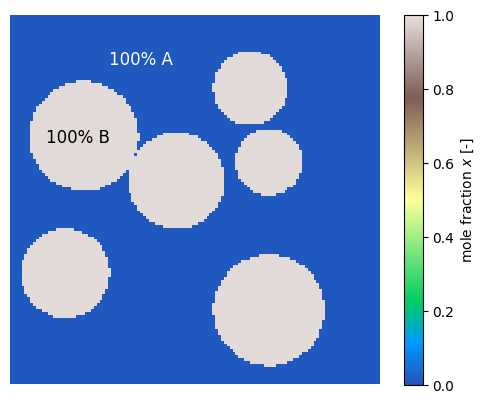

In [11]:
nx = 128 #256

domain = create_unit_square(MPI.COMM_WORLD, nx, nx, CellType.quadrilateral)

n = FacetNormal(domain)

RT = FunctionSpace(domain, ("RTCF", 1))
DG = FunctionSpace(domain, ("DG", 0)) 
CG = FunctionSpace(domain, ("CG", 1)) 

e_DG = FiniteElement("DG", domain.ufl_cell(), 0)
e_RT = FiniteElement("RTCF", domain.ufl_cell(), 1)

W = FunctionSpace(domain, MixedElement([e_DG, e_RT, e_DG]))

w         = Function(W)
(X, j, a) = split(w) 
q         = TestFunction(W)

dt = 1e-3
dx = Measure("dx", metadata={"quadrature_degree": 1})
# 1=>1 integrationpoint for quad
# 3=>4 integrationpoints for quad

X_0 = Function(DG)
X_0.interpolate(lambda x: 0.01 + 0.98*(((x[0]-0.15)**2+(x[1]-0.3)**2)**0.5 < 0.12) 
                               + 0.98*(((x[0]-0.45)**2+(x[1]-0.55)**2)**0.5 < 0.13) 
                               + 0.98*(((x[0]-0.7)**2+(x[1]-0.2)**2)**0.5 < 0.15)  
                               + 0.98*(((x[0]-0.2)**2+(x[1]-0.67)**2)**0.5 < 0.148) 
                               + 0.98*(((x[0]-0.7)**2+(x[1]-0.6)**2)**0.5 < 0.09) 
                               + 0.98*(((x[0]-0.65)**2+(x[1]-0.8)**2)**0.5 < 0.1))

X_n = Function(DG)
X_n.interpolate(X_0)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

def DG_2_grid(array, domain, nx):
    
    V = FunctionSpace(domain, ("CG", 1)) 
    topology, cell_types, x = vtk_mesh(V)
    coincidenceTable = topology.reshape(len(topology)//5,5)
   
    solution = numpy.zeros((nx,nx))
    for i in range(nx**2):
        loc = (x[coincidenceTable[i][1]] + x[coincidenceTable[i][2]] + x[coincidenceTable[i][3]] + x[coincidenceTable[i][4]])/4
        loc = loc*nx - numpy.array([0.5,0.5,0.0])
        loc = [int(i) for i in loc]
        solution[loc[0]][loc[1]] = array[i]
        
    return numpy.flip(solution.T, axis=0)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(numpy.linspace(minval, maxval, n)))
    return new_cmap


plt.figure(dpi=100)
plt.imshow(DG_2_grid(X_n.x.array, domain, nx), vmin=0, vmax=1, interpolation='none', 
            cmap=truncate_colormap(plt.get_cmap('terrain'),0.05,0.95)) # summer jet gnuplot2 terrain_r
plt.colorbar().set_label('mole fraction $x$ [-]',size=10)
plt.axis('off')
plt.text(23, 42, "100% B",                ha='center', va='center', fontsize=12)
plt.text(45, 15, "100% A", color='white', ha='center', va='center', fontsize=12)
plt.show()


**Figure 7:** The initial condition of the mole fraction $x$ in a two dimensional domain of unit length. The components of the binary system are enirely separated from each other. The blue region corresponds to component 2 and phase $\alpha$ and the red region corresponds to component 1 and phase $\beta$.

calculation time: 32.0 [min]


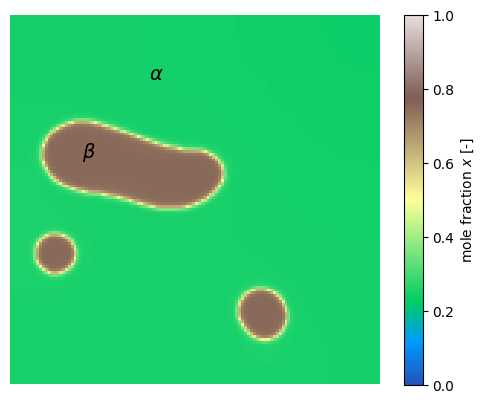

In [12]:
X_n.interpolate(X_0)

L  = ( (f_0(X)-f_0(X_n))/dt + dot(j,j)/2 + a*((X-X_n)/dt + div(j)) )*dx 
L += (0.001/dt)*dot(jump(X,n),jump(X,n))*dS

dL = derivative(L,w,q)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

def on_boundary(x):
    return numpy.full(x.shape[1], True, dtype=bool)

boundary_facets = locate_entities_boundary(domain, domain.topology.dim-1, on_boundary)

j_B             = Function(RT)
SUB1, _         = W.sub(1).collapse()
boundary_dofs_j = locate_dofs_topological((W.sub(1), SUB1), domain.topology.dim-1, boundary_facets)
bc_j            = dirichletbc(j_B, boundary_dofs_j, W.sub(1))

bc = [bc_j]

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

problem = NonlinearProblem(dL, w, bc)
solver  = NewtonSolver(MPI.COMM_WORLD, problem)

solver.convergence_criterion = "incremental"
solver.relaxation_parameter = 0.5
solver.max_it = 100 

t = 0
start = time.perf_counter()
for i in range(100):

    try:
        solver.solve(w)
        X_n.interpolate(w.sub(0))
        t += dt
        
    except: 
        print("breaking...")
        print("iterations:",i)
        break
          
end = time.perf_counter()
print("calculation time:", (end-start)//60,"[min]")

def show(X_n):
    plt.figure(dpi=100)
    plt.imshow(DG_2_grid(X_n.x.array, domain, nx), vmin=0, vmax=1, interpolation='none', 
               cmap=truncate_colormap(plt.get_cmap('terrain'),0.05,0.95)) # summer jet gnuplot2 terrain_r
    plt.colorbar().set_label('mole fraction $x$ [-]',size=10)
    plt.axis('off')
    plt.text(27, 47, r"$\beta$",  ha='center', va='center', fontsize=14)
    plt.text(50, 20, r"$\alpha$", ha='center', va='center', fontsize=14)
    plt.show()
    
show(X_n)

**Figure 8:** System evolution of the standard Cahn-Hilliard model. The contour visible is the distribution of the mole fraction $x$ after $0.1[s]$. The molar free energy $f_0(x)$ from Figure 1 is employed and the homogenization parameter was set to $\kappa = 1$. All other parameters were set to one ($L = T = \Omega = 1$). The simulation took approximately 48 minutes (single threaded).

calculation time: 4.0 [min]


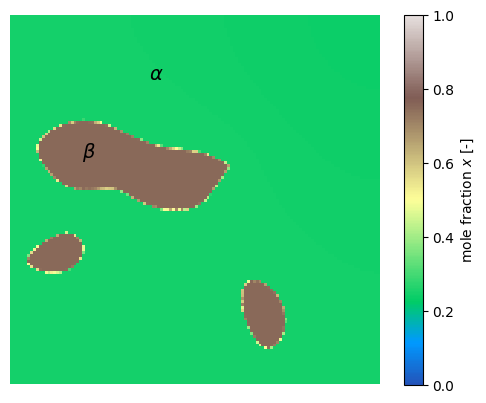

In [13]:
X_n.interpolate(X_0)

L  = ( (f0_(X)-f0_(X_n))/dt + dot(j,j)/2 + a*((X-X_n)/dt + div(j)) )*dx 

dL = derivative(L,w,q)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

problem = NonlinearProblem(dL, w, bc)
solver  = NewtonSolver(MPI.COMM_WORLD, problem)

solver.convergence_criterion = "incremental"
solver.relaxation_parameter = 0.5
solver.max_it = 100 

t = 0
start = time.perf_counter()
for i in range(100):

    try:
        solver.solve(w)
        X_n.interpolate(w.sub(0))
        t += dt
 
    except: 
        print("breaking...")
        print("iterations:",i)
        break

end = time.perf_counter()
print("calculation time:", (end-start)//60,"[min]")
show(X_n)

**Figure 9:** System evolution for limiting case (ii).The contour visible is the distribution of the mole fraction $x$ after $0.1[s]$. The convex molar free energy $f_{0}^{**}(x)$ from Figure 1 is employed and the homogenization parameter was set to $\kappa = 0$. All other parameters were set to one ($L = T = \Omega = 1$). The simulation took approximately 7 minutes (single threaded).

calculation time: 30.0 [min]


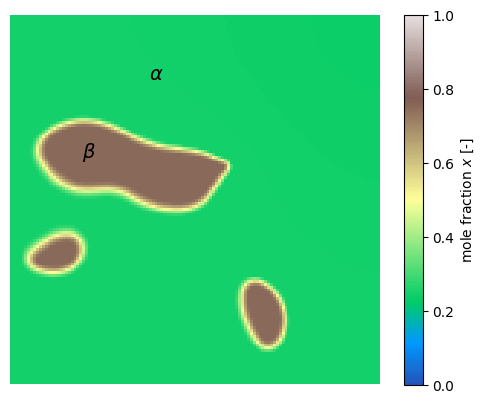

In [14]:
X_n.interpolate(X_0)

L  = ( (f0_(X)-f0_(X_n))/dt + dot(j,j)/2 + a*((X-X_n)/dt + div(j)) )*dx 
L += (1e-5/dt)*dot(jump(X,n),jump(X,n))*dS

dL = derivative(L,w,q)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

problem = NonlinearProblem(dL, w, bc)
solver  = NewtonSolver(MPI.COMM_WORLD, problem)

solver.convergence_criterion = "incremental"
solver.relaxation_parameter = 0.5
solver.max_it = 100 

t = 0
start = time.perf_counter()
for i in range(100):

    try:
        solver.solve(w)
        X_n.interpolate(w.sub(0))
        t += dt
        
    except: 
        print("breaking...")
        print("iterations:",i)
        break

end = time.perf_counter()
print("calculation time:", (end-start)//60,"[min]")
show(X_n)

**Figure 10:** System evolution for limiting case (i). The contour visible is the distribution of the mole fraction $x$ after $0.1[s]$. The convex molar free energy $f_{0}^{**}(x)$ from Figure 1 is employed and the homogenization parameter was set to $\kappa = 1$. All other parameters were set to one ($L = T = \Omega = 1$). The simulation took approximately 46 minutes (single threaded).

calculation time: 14.0 [min]


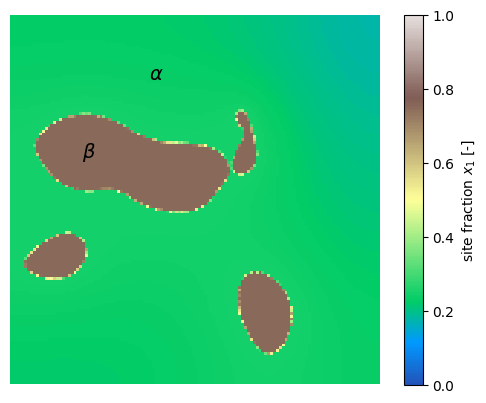

In [15]:

W = FunctionSpace(domain, MixedElement([e_DG, e_DG, e_RT, e_RT, e_DG, e_DG, e_DG]))

w                             = Function(W)
(X0, X1, j0, j1, a0, a1, phi) = split(w) 
q                             = TestFunction(W)

X0_ = Function(DG)
X1_ = Function(DG) 

X0_.x.array[:] += 1e-3
X1_.interpolate(X_0)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

j_B              = Function(RT)

SUB2, _          = W.sub(2).collapse()
boundary_dofs_j0 = locate_dofs_topological((W.sub(2), SUB2), domain.topology.dim-1, boundary_facets)
bc_j0            = dirichletbc(j_B, boundary_dofs_j0, W.sub(2))

SUB3, _          = W.sub(3).collapse()
boundary_dofs_j1 = locate_dofs_topological((W.sub(3), SUB3), domain.topology.dim-1, boundary_facets)
bc_j1            = dirichletbc(j_B, boundary_dofs_j1, W.sub(3))

bc = [bc_j0, bc_j1]

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

def f0(X0, X1): 
    return f0_(X1) + 100*(X0-1e-3)**2

L  = (f0(X0, X1) - f0(X0_, X1_))/dt 
L += dot(j1,j1)/2 + dot(-j0-j1,-j0-j1) + phi**2
L += a1*((X1-X1_)/dt + div(j1) + phi*X1_ ) + a0*((X0-X0_)/dt + div(j0) - phi*(1-X0_)) 
L  = L*dx 

dL = derivative(L,w,q)

""" + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + """

problem = NonlinearProblem(dL, w, bc)
solver  = NewtonSolver(MPI.COMM_WORLD, problem)

solver.convergence_criterion = "incremental"
solver.relaxation_parameter = 0.5
solver.max_it = 100 

t = 0
start = time.perf_counter()
for i in range(100):

    try:
        solver.solve(w)
        X0_.interpolate(w.sub(0))
        X1_.interpolate(w.sub(1))
        t += dt
 
    except: 
        print("breaking...")
        print("iterations:",i)
        break

end = time.perf_counter()
print("calculation time:", (end-start)//60,"[min]")

def show(X_n):
    plt.figure(dpi=100)
    plt.imshow(DG_2_grid(X_n.x.array, domain, nx), vmin=0, vmax=1, interpolation='none', 
               cmap=truncate_colormap(plt.get_cmap('terrain'),0.05,0.95))
    plt.colorbar().set_label('site fraction $x_1$ [-]',size=10)
    plt.axis('off')
    plt.text(27, 47, r"$\beta$",  ha='center', va='center', fontsize=14)
    plt.text(50, 20, r"$\alpha$", ha='center', va='center', fontsize=14)
    plt.show()

show(X1_)

**Figure 11:** System evolution for the variational problem defined in equation (57). The contour visible is the distribution of the site fraction of component $x_1$ after $0.1[s]$. The parameters were chosen as follows: $x_{q}^{eq}=0.001$, $k=100$, $A_0 \rightarrow \infty$, $A_1=2$, $A_2=A_{\phi}=\Omega=1$. The simulation took approximately 22 minutes (single threaded).

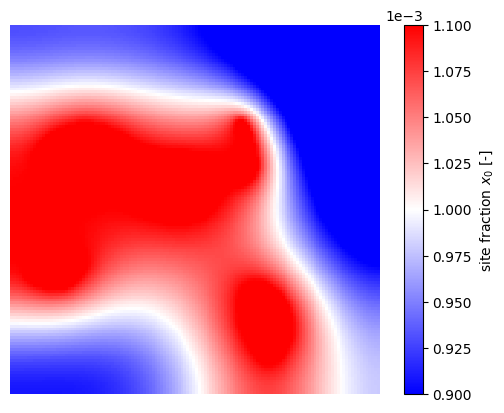

In [26]:
def show(X_n):
    plt.figure(dpi=100)
    plt.imshow(DG_2_grid(X_n.x.array, domain, nx), vmin=9e-4, vmax=11e-4, interpolation='none', cmap='bwr')
    cbar = plt.colorbar()
    cbar.formatter.set_powerlimits((0, 0))
    cbar.set_label('site fraction $x_0$ [-]', size=10)
    plt.axis('off')
    plt.show()

show(X0_)

**Figure 12:** System evolution for the variational problem defined in equation (57). The contour visible is the distribution of the site fraction of vacancies $x_0$ after $0.1[s]$. The parameters were chosen as follows: $x_{q}^{eq}=0.001$, $k=100$, $A_0 \rightarrow \infty$, $A_1=2$, $A_2=A_{\phi}=\Omega=1$. The simulation took approximately 22 minutes (single threaded).

# 4 Conclusion

In this paper, we have introduced a novel methodology for mathematically modeling first and second order phase
transformations. By relating our approach to limiting cases of the Cahn-Hilliard equation, we demonstrate the
versatility and potential of our method in handling complex phase transformations. The incorporation and explicit solving for
rate-dependent variables like the flux allows us to stabilize solutions and overcome limitations imposed by traditional
numerical techniques.
Our approach to diffusional phase transformations and the Phase Field Method provides a novel application of existing
mixed finite element approaches, offering a promising framework for investigating these phenomena. 
We also demonstrated the thermodynamic consistency of the reactive diffusion models and the Phase Field Method in general and 
helped to bridge the gaps between these fields. In doing so we also removed a widespread misconception regarding the chemical potential
and its role as driving force for diffusion.
Our work contributes to the development of new mathematical tools for modeling complex phase transformations in materials
science, ultimately enriching our understanding of these fundamental processes. Future studies can build upon this
foundation, exploring further applications and refinements to enhance the predictive capabilities of our
methodology.

### CRediT authorship contribution statement

W. Flachberger: Conceptualization, Methodology, Formal Analysis, Writing – original draft. T. Antretter, J. Svoboda, S. Leitner, M. Petersmann: Supervision, Project administration, Funding acquisition, Writing – review & editing.

### Acknowledgement

The authors gratefully acknowledge the financial support under the scope of the 
COMET program within the K2 Center “Integrated Computational Material, 
Process and Product Engineering (IC-MPPE)” (Project 886385). This program is 
supported by the Austrian Federal Ministries for Climate Action, Environment, 
Energy, Mobility, Innovation and Technology (BMK) and for Digital and Economic 
Affairs (BMDW), represented by the Austrian research funding association (FFG), 
and the federal states of Styria, Upper Austria and Tyrol.

Additionally the authors want to thankfully mention Jeremy Bleyer, currently affiliated 
with Laboratoire Navier of the Ecole des Ponts ParisTech, who gave valuable advice on 
mixed finite element formulations.

# Appendix A: Demonstrating the Satisfaction of the Gibbs-Duhem Condition

The Gibbs-Duhem condition reads: 

$$ \sum_{j=1}^{n} m_j  d\mu_j = 0 \tag{58} $$

For a mass conserved system, equation (58) can be divided by the total number of moles to yield an expression including the mole fraction (according to equations (8) & (9)):

$$ \sum_{j=1}^{n} x_j  d\mu_j = 0 \tag{59} $$

Again, the last element of the sum can be explicitly adressed:

$$ \sum_{j=1}^{n-1} x_j  d\mu_j  + x_n  d\mu_n = 0 \tag{60} $$

The chemical potential from equation (13) can be insertet for $\mu$:

$$ \sum_{j=1}^{n-1} x_j  d\Big( f_m + \sum_{k=1}^{n-1} (\delta_{jk} - x_k) \frac{\partial f_m}{\partial x_k} \Big)  +  x_n  d\Big(  f_m - \sum_{k=1}^{n-1} x_k \frac{\partial f_m}{\partial x_k} \Big) = 0 \tag{61} $$

The site fraction of the last component was defined in equation (18) and can be substituted for $x_n$:

$$ \sum_{j=1}^{n-1} x_j \Big( df_m + \sum_{k=1}^{n-1} (\delta_{jk} - x_k)  d\Big(\frac{\partial f_m}{\partial x_k}\Big) - \sum_{k=1}^{n-1} dx_k  \Big(\frac{\partial f_m}{\partial x_k}\Big) \Big) + \big( 1 - \sum_{i=1}^{n-1} x_i \big)  \Big(  df_m - \sum_{k=1}^{n-1} dx_k \frac{\partial f_m}{\partial x_k} - \sum_{k=1}^{n-1} x_k d\Big(\frac{\partial f_m}{\partial x_k} \Big) \Big) = 0 \tag{62} $$

$$ \sum_{j=1}^{n-1} x_j \Big( \sum_{k=1}^{n-1} (\delta_{jk} - x_k)  d\Big(\frac{\partial f_m}{\partial x_k}\Big)  \Big) + \big( 1 - \sum_{i=1}^{n-1} x_i \big)  \Big(  - \sum_{k=1}^{n-1} x_k d\Big(\frac{\partial f_m}{\partial x_k} \Big) \Big)  = 0 \tag{63} $$

$$ \sum_{j=1}^{n-1} \sum_{k=1}^{n-1} x_j (\delta_{jk} - x_k)  d\Big(\frac{\partial f_m}{\partial x_k}\Big) - \sum_{k=1}^{n-1} x_k d\Big(\frac{\partial f_m}{\partial x_k} \Big) + \sum_{i=1}^{n-1} \sum_{k=1}^{n-1} x_i x_k d\Big(\frac{\partial f_m}{\partial x_k} \Big)  = 0 \tag{64} $$

$$ \sum_{j=1}^{n-1} \sum_{k=1}^{n-1} x_j \delta_{jk} d\Big(\frac{\partial f_m}{\partial x_k}\Big) - \sum_{j=1}^{n-1} \sum_{k=1}^{n-1} x_j x_k d\Big(\frac{\partial f_m}{\partial x_k}\Big) - \sum_{k=1}^{n-1} x_k d\Big(\frac{\partial f_m}{\partial x_k} \Big) + \sum_{i=1}^{n-1} \sum_{k=1}^{n-1} x_i x_k d\Big(\frac{\partial f_m}{\partial x_k} \Big)  = 0 \tag{65} $$

$$ \sum_{j=1}^{n-1} \sum_{k=1}^{n-1} x_j \delta_{jk} d\Big(\frac{\partial f_m}{\partial x_k}\Big) - \sum_{k=1}^{n-1} x_k d\Big(\frac{\partial f_m}{\partial x_k} \Big)= 0 \tag{66} $$

$$ \sum_{j=1}^{n-1}  x_j d\Big(\frac{\partial f_m}{\partial x_j}\Big) - \sum_{k=1}^{n-1} x_k d\Big(\frac{\partial f_m}{\partial x_k} \Big)= 0 \tag{67} $$

$$ \mathcal{Q}.\mathcal{E}.\mathcal{D}. $$

# Appendix B: Special Properties of the limiting cases for different molar volumes of the phases

Consider the Lagrangian of a binary system:

$$ \mathcal{L}(x, \underline{j}, \bar{\mu}) := \frac{d}{dt} \big(\frac{f_m}{\Omega}\big) + \frac{T}{2L} |\underline{j}|^2 +  \bar{\mu} \Big( \frac{d}{dt} \big(\frac{x} {\Omega}\big) + \nabla \cdot \underline{j}\Big) \tag{68} $$

This time a more general case is studied where not only the molar free energy $f_m$ but also the molar volume $\Omega$ are explicitly dependent on the mole fraction $x$:

$$ f_m := f_m(x) \tag{69} $$

$$ \Omega := \Omega(x) \tag{70} $$

Application of the Euler-Lagrange equation with respect to $x$ yields the affinity $\bar{\mu}$:

$$ \frac{\delta \mathcal{L}}{\delta x} := \frac{d}{dt} \Big( \frac{f_{m}^{'} \Omega - f_{m} \Omega_{}^{'}}{\Omega^2} \Big) - \bar{\mu} \frac{d}{dt} \Big( \frac{\Omega - x \Omega_{}^{'}}{\Omega^2} \Big) = 0  \;\; \Big| \cdot dt \tag{71} $$

$$ \bar{\mu} = \frac{d \Big( \frac{f_{m}^{'} \Omega - f_{m} \Omega_{}^{'}}{\Omega^2} \Big)}{d \Big( \frac{\Omega - x \Omega_{}^{'}}{\Omega^2} \Big)} \tag{72} $$

As expected, the dependencies are now more involved. However, if $f_{m}$ is a linear function of $x$, which is the case for limiting cases (i) and (ii) at least in the interface region, we can express $f_{m}$ as follows: 

$$  f_{m} = f_{m}^{'} x \tag{73} $$

where, $f_{m}^{'}$ is of course a constant. This simplifies equation (72): 

$$ \bar{\mu} = \frac{d \Big( f_{m}^{'} \frac{ \Omega - x \Omega_{}^{'}}{\Omega^2} \Big)}{d \Big( \frac{\Omega - x \Omega_{}^{'}}{\Omega^2} \Big)} = f_{m}^{'} \tag{74} $$

The condition is therfore satisfied at the interface. For the bulk area another consideration can be made: If $\Omega(x)$ is constructed by typical functions for the phase fraction, that is functions that are constant over each specific phase and have a smooth transition at the interface, we can make the following simplification for non-interface, i.e. bulk, areas: 

$$ \bar{\mu} = \frac{d \Big( \frac{f_{m}^{'} \Omega - f_{m} \Omega_{}^{'}}{\Omega^2} \Big)}{d \Big( \frac{\Omega - x \Omega_{}^{'}}{\Omega^2} \Big)} = \frac{d \Big( \frac{f_{m}^{'} \Omega}{\Omega^2} \Big)}{d \Big( \frac{\Omega}{\Omega^2} \Big)} = \frac{d \Big( \frac{f_{m}^{'}}{\Omega} \Big)}{d \Big( \frac{1}{\Omega} \Big)} = f_{m}^{'} \tag{75} $$

Therfore it is obvious that the variational forms (49)-(51) can be employed for the special cases (i) and (ii) if phases with different molar volumes are to be modeled. For the general case, equation (72) has to be employed. The variational framework however also allows the variational derivatives to be automated for the general case.


# References 

[cahn1958free] 
> Cahn, John W., and John E. Hilliard. "Free energy of a nonuniform system. I. Interfacial free energy." The Journal of chemical physics 28.2 (1958): 258-267.

[svoboda2005application]
> Svoboda, Jiri, Ilja Turek, and Franz Dieter Fischer. "Application of the thermodynamic extremal principle to modeling of thermodynamic processes in material sciences." Philosophical Magazine 85.31 (2005): 3699-3707.

[svoboda2006diffusion]
> Svoboda, J., Franz Dieter Fischer, and P. Fratzl. "Diffusion and creep in multi-component alloys with non-ideal sources and sinks for vacancies." Acta materialia 54.11 (2006): 3043-3053.

[svoboda2013new]
> Svoboda, Jiri, and Franz Dieter Fischer. "A new computational treatment of reactive diffusion in binary systems." Computational materials science 78 (2013): 39-46.

[svoboda2017incorporation]
> Svoboda, J., and F. D. Fischer. "Incorporation of vacancy generation/annihilation into reactive diffusion concept–Prediction of possible Kirkendall porosity." Computational Materials Science 127 (2017): 136-140.

[svoboda2023note] 
> Svoboda, Jiri, Klaus Hackl, and Franz-Dieter Fischer. "A note on maxima and minima of dissipation in context of treatment of irreversible thermodynamic systems by application of extremal principles." Scripta Materialia 233 (2023): 115519.

[acosta2023upwind]
> Acosta-Soba, Daniel, Francisco Guillén-González, and J. Rafael Rodríguez-Galván. "An upwind DG scheme preserving the maximum principle for the convective Cahn-Hilliard model." Numerical Algorithms 92.3 (2023): 1589-1619.

[acosta2024analysis]
> Soba, Daniel Acosta. Analysis and numerical simulation of tumor growth models. Diss. Universidad de Cádiz, 2024.

[brezzi1985two]
> Brezzi, Franco, Jim Douglas, and L. Donatella Marini. "Two families of mixed finite elements for second order elliptic problems." Numerische Mathematik 47 (1985): 217-235.

[flachberger2024numerical]
> Flachberger, Wolfgang, et al. "Numerical treatment of reactive diffusion using the discontinuous Galerkin method." Continuum Mechanics and Thermodynamics 36.1 (2024): 61-74.

[flachberger2021investigating]
> Flachberger, Wolfgang. "Investigating the possibility to solve the Hamilton-Jacobi-Bellman Equation by the Finite Element Method to enable feedback control of nonlinear dynamical systems." (2021).

[nagaraja2023variational]
> Nagaraja, Swaroop Gaddikere, Wolfgang Flachberger, and Thomas Antretter. "Variational formulation of Cahn–Hilliard-type diffusion coupled with crystal plasticity." International Journal of Plasticity 167 (2023): 103652.

[dreyer2017sharp] 
> Dreyer, Wolfgang, and Clemens Guhlke. "Sharp limit of the viscous Cahn–Hilliard equation and thermodynamic consistency." Continuum Mechanics and Thermodynamics 29 (2017): 913-934.

[BarattaEtal2023] 
> Barrata, Igor A., et al. "DOLFINx: The next generation FEniCS problem solving environment." (2023).

[ScroggsEtal2022]
> Scroggs, Matthew W., et al. "Construction of arbitrary order finite element degree-of-freedom maps on polygonal and polyhedral cell meshes." ACM Transactions on Mathematical Software (TOMS) 48.2 (2022): 1-23.

[BasixJoss]
> Scroggs, Matthew W., et al. "Basix: a runtime finite element basis evaluation library." Journal of Open Source Software 7.73 (2022): 3982.

[AlnaesEtal2014]
> Alnæs, Martin, et al. "The FEniCS project version 1.5." Archive of numerical software 3.100 (2015).

[kondepudi2014modern]
> Kondepudi, Dilip, and Ilya Prigogine. Modern thermodynamics: from heat engines to dissipative structures. John wiley & sons, 2014.

[lupis1983chemical]
> Lupis, Claude HP. "Chemical thermodynamics of materials." (No Title) (1983).

[emmerich2003diffuse]
> Emmerich, Heike. The diffuse interface approach in materials science: thermodynamic concepts and applications of phase-field models. Vol. 73. Springer Science & Business Media, 2003.

[silverstein1998real]
> Silverstein, Todd P. "The real reason why oil and water don't mix." Journal of chemical education 75.1 (1998): 116.

[walker2015shapes] 
> Walker, Shawn W. The shapes of things: a practical guide to differential geometry and the shape derivative. Society for industrial and applied mathematics, 2015.

[kim2016basic] 
> Kim, Junseok, et al. "Basic principles and practical applications of the Cahn–Hilliard equation." Mathematical Problems in Engineering 2016.1 (2016): 9532608.

[van1995python]
> Van Rossum, Guido, and Fred L. Drake. Python reference manual. Vol. 111. Amsterdam: Centrum voor Wiskunde en Informatica, 1995.

[sullivan2019pyvista]
> Sullivan, C., and Alexander Kaszynski. "PyVista: 3D plotting and mesh analysis through a streamlined interface for the Visualization Toolkit (VTK)." Journal of Open Source Software 4.37 (2019): 1450.

[hunter2007matplotlib]
> Hunter, John D. "Matplotlib: A 2D graphics environment." Computing in science & engineering 9.03 (2007): 90-95.

[manning1971correlation]
> Manning, John R. "Correlation factors for diffusion in nondilute alloys." Physical Review B 4.4 (1971): 1111.

[miehe2014formulation]
> Miehe, Christian, Steffen Mauthe, and H. Ulmer. "Formulation and numerical exploitation of mixed variational principles for coupled problems of Cahn–Hilliard‐type and standard diffusion in elastic solids." International journal for numerical methods in engineering 99.10 (2014): 737-762.